In [1]:
using AlgebraicPetri
using Catlab.Graphs.BasicGraphs
using Catlab.CategoricalAlgebra
using Catlab.WiringDiagrams
using Catlab.Programs
using Catlab.Graphics

include("ModelStratify.jl");

display_uwd(ex, prog="neato") = to_graphviz(ex, box_labels=:name, junction_labels=:variable, graph_attrs=Dict(:overlap => "false"), prog=prog)

display_uwd (generic function with 2 methods)

## Define Epidemiology Model

We first define the two epidemiology models that we want to combine. For this example, we read in the SEIRD and SIR models, and will combine them over the S state.

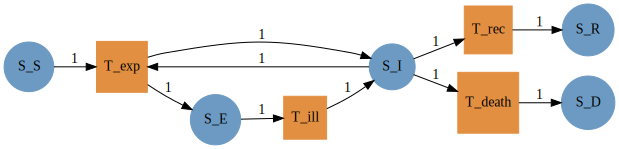

In [2]:
# Read in json string
seird_json = open(f->read(f, String), "models/seird.json");
# Parse json to object
seird = ModelStratify.deserialize(seird_json, LabelledPetriNet);
# Graph initial model
AlgebraicPetri.Graph(seird)

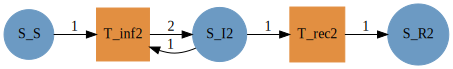

In [3]:
# Read in json string
sir_json = open(f->read(f, String), "models/sir.json");
# Parse json to object
sir = ModelStratify.deserialize(sir_json, LabelledPetriNet);
# We need to rename transitions in this one so that the renderer 
# will show all transitions in the final merge
sir = LabelledPetriNet(sir, [:S,:I2,:R2], [:inf2, :rec2])
# Graph initial model
AlgebraicPetri.Graph(sir)

## Define the UWD
The Undirected Wiring Diagram (UWD) will provide the pattern for composing the two models. This `@relation` macro allows users to easily define the UWD. The resulting UWD is then displayed, showing the desired composition over the `S` state.

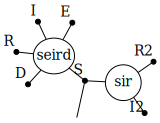

In [4]:
s_connect = @relation (S,) where (S,E,I,R,D,I2,R2) begin
    seird(S,E,I,R,D)
    sir(S,I2,R2)
end

#ModelStratify.serialize(s_connect)
display_uwd(s_connect)

## Composing the Models
In order to compose the models, we first need to make them Open Petri nets, which turns them into Cospans (with feet in FinSet and apexes in states of the Petri net).

`oapply` then takes the mapping from box labels to Open Petri nets, and combines the Petri nets following the pattern in the UWD.

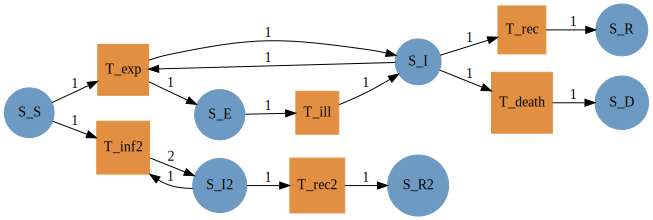

In [5]:
o_seird = Open(seird)
o_sir = Open(sir)

joined = oapply(s_connect, Dict(:seird=>o_seird, :sir=>o_sir))
AlgebraicPetri.Graph(apex(joined))

## UWD in JSON format
The UWD can be (de)serialized to a json format for storage/transfer just as the Petri nets and graphs can be (de)serialized.

In [6]:
ModelStratify.serialize(s_connect)

{
  "Box": [
    {
      "name": "seird"
    },
    {
      "name": "sir"
    }
  ],
  "Port": [
    {
      "box": 1,
      "junction": 1
    },
    {
      "box": 1,
      "junction": 2
    },
    {
      "box": 1,
      "junction": 3
    },
    {
      "box": 1,
      "junction": 4
    },
    {
      "box": 1,
      "junction": 5
    },
    {
      "box": 2,
      "junction": 1
    },
    {
      "box": 2,
      "junction": 6
    },
    {
      "box": 2,
      "junction": 7
    }
  ],
  "OuterPort": [
    {
      "outer_junction": 1
    }
  ],
  "Junction": [
    {
      "variable": "S"
    },
    {
      "variable": "E"
    },
    {
      "variable": "I"
    },
    {
      "variable": "R"
    },
    {
      "variable": "D"
    },
    {
      "variable": "I2"
    },
    {
      "variable": "R2"
    }
  ]
}
